In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('Data/CO2 Emissions in Rwanda/train.csv')
X_train = train_df.drop(columns='emission')
y_train = train_df['emission']

In [3]:
X_test = pd.read_csv('Data/CO2 Emissions in Rwanda/test.csv')
y_test = pd.read_csv('Data/CO2 Emissions in Rwanda/sample_submission.csv')['emission']

In [4]:
train_df

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2019_00    -0.510     29.290  2019        0   
1      ID_-0.510_29.290_2019_01    -0.510     29.290  2019        1   
2      ID_-0.510_29.290_2019_02    -0.510     29.290  2019        2   
3      ID_-0.510_29.290_2019_03    -0.510     29.290  2019        3   
4      ID_-0.510_29.290_2019_04    -0.510     29.290  2019        4   
...                         ...       ...        ...   ...      ...   
79018  ID_-3.299_30.301_2021_48    -3.299     30.301  2021       48   
79019  ID_-3.299_30.301_2021_49    -3.299     30.301  2021       49   
79020  ID_-3.299_30.301_2021_50    -3.299     30.301  2021       50   
79021  ID_-3.299_30.301_2021_51    -3.299     30.301  2021       51   
79022  ID_-3.299_30.301_2021_52    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                           NaN   
4                                     -0.000079   
...                                         ...   
79018                                  0.000284   
79019                                  0.000083   
79020                                       NaN   
79021                                 -0.000034   
79022                                 -0.000091   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.603019   
1                                          0.728214   
2                                          0.748199   
3                                               NaN   
4                                          0.676296   
...                                             ...   
79018                                      1.195643   
79019                                      1.130868   
79020                                           NaN   
79021                                      0.879397   
79022                                      0.871951   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                           -0.000065   
1                                            0.000014   
2                                            0.000385   
3                                                 NaN   
4                                           -0.000048   
...                                               ...   
79018                                        0.000340   
79019                                        0.000063   
79020                                             NaN   
79021                                       -0.000028   
79022                                       -0.000079   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.255668                           -98.593887   
1                           0.130988                            16.592861   
2                           0.110018                            72.795837   
3                                NaN                                  NaN   
4                           0.121164                             4.121269   
...                              ...                                  ...   
79018                       0.191313                            72.820518   
79019                       0.177222                           -12.856753   
79020                            NaN                                  NaN   
79021                       0.184209                          -100.344827   
79022                       0.000000                            76.825638   

       ...  Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
0      ...             3664.436218               61085.809570   
1      ...             3651.190311               66969.478735   
2      ...             4216.986492               60068.894448   
3      ...    

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [6]:
train_df.shape

(79023, 76)

In [7]:
missing_percentage = (((train_df.isnull().sum() / len(train_df)) * 100).sort_values(ascending=False))

In [8]:
missing_percentage[missing_percentage > 75].index

Index(['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_solar_zenith_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle'],
      dtype='object')

In [9]:
X_train = X_train.drop(columns=missing_percentage[missing_percentage > 75].index)
X_test = X_test.drop(columns=missing_percentage[missing_percentage > 75].index)

In [10]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [12]:
X_train = X_train.drop(columns=['ID_LAT_LON_YEAR_WEEK'])
X_test = X_test.drop(columns=['ID_LAT_LON_YEAR_WEEK'])

KeyError: "['ID_LAT_LON_YEAR_WEEK'] not found in axis"

In [ ]:
X_train['year'].unique()

array([2019, 2020, 2021], dtype=int64)

In [ ]:
X_train.groupby('year')['emission'].mean()

year
2019    87.506167
2020    76.363080
2021    83.293702
Name: emission, dtype: float64

In [15]:
correlation = X_train.corr()

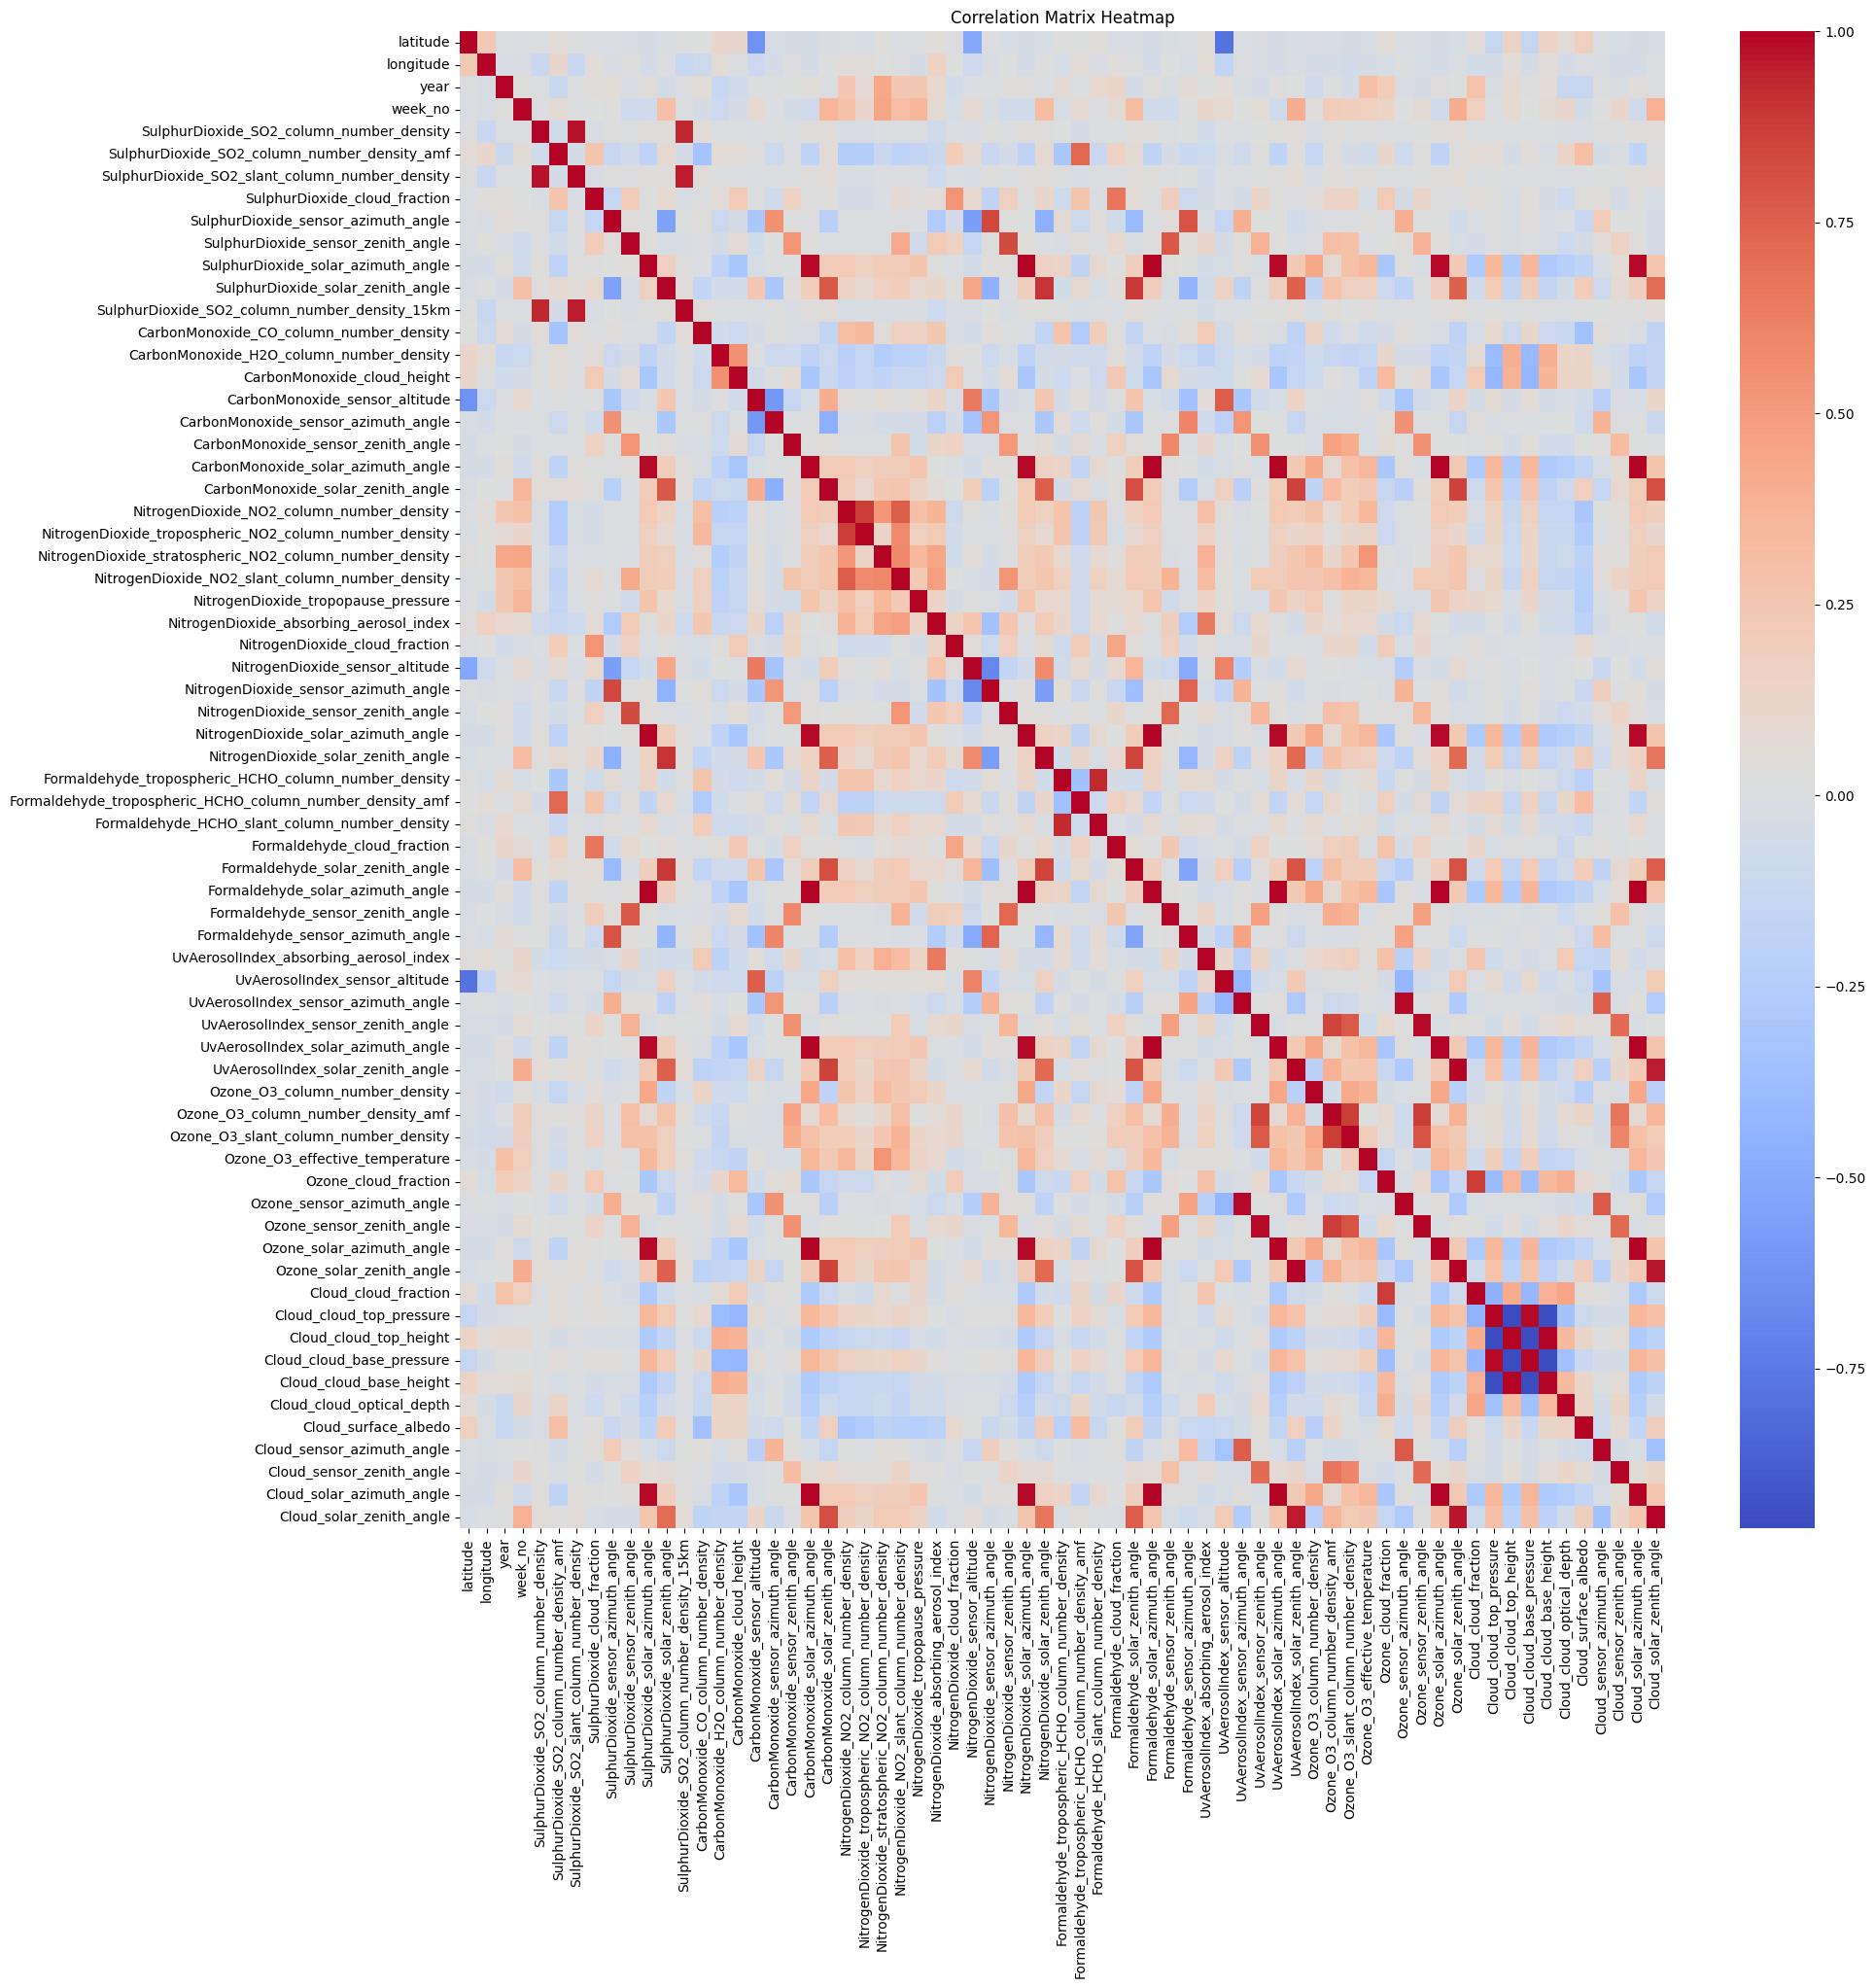

In [16]:
# Create a heatmap using Seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
from sklearn.feature_selection import VarianceThreshold

In [19]:
# Set the threshold value (you can experiment with different values)
threshold_value = 0.1

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=threshold_value)

# Fit and transform the feature matrix
X_selected = selector.fit_transform(X_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

In [20]:
len(selected_features)

46

In [22]:
X_train.shape

(57209, 67)